In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

nitrogen_df = pd.read_csv('Nitrogen_loads.csv')
nitrogen_df = nitrogen_df.drop(['Land-River Segment', 'FIPS'], axis=1)
nitrogen_df.head()

County Tributary Basin          Major Basin  Source Sector  \
0  ALLEGANY   Upper Potomac  Potomac River Basin         Forest   
1  ALLEGANY   Upper Potomac  Potomac River Basin  Non-Tidal Atm   
2  ALLEGANY   Upper Potomac  Potomac River Basin         Septic   
3  ALLEGANY   Upper Potomac  Potomac River Basin     Stormwater   
4  ALLEGANY   Upper Potomac  Potomac River Basin     Wastewater   

   Total N, 1985 (lb.)  Total N, 2007 (lb.)  Total N, 2009 (lb.)  \
0         51155.919440         44291.188480         44013.497320   
1            23.744801            11.600470            11.600470   
2           593.984192           539.573425           534.814819   
3          4163.487261          2510.113876          2473.745250   
4           153.179901            54.931515           298.770703   

   Total N, 2010 (lb.)  Total N, 2011 (lb.)  Total N, 2012 (lb.)  \
0         44071.130370         44127.954830         44065.744140   
1            11.600470            11.600470            11.600470   
2           532.096191           530.284119           527.565125   
3          2463.564675          2455.817180          2456.445068   
4           111.263986           113.858285           101.050881   

   Total N, 2013 (lb.)  Total N, 2014 (lb.)  Total N, 2015 (lb.)  \
0         43439.700190         42644.769650         42279.000080   
1            11.600470            11.600470            11.600470   
2           687.846619           553.043579           547.539978   
3          5187.855037          2569.293440          2718.073060   
4            93.216107           170.578984             0.902378   

   Total N, 2016 (lb)  Total N Target, 2017 (lb.)  Total N Target 2025 (lb.)  
0        43150.365480                44567.218760               44936.366390  
1           11.600470                   11.600469                  11.600469  
2          542.895386                  466.803913                 421.463309  
3         2686.010203                 2278.617397                2148.532161  
4           68.777241                  160.712233                  68.673253

precipitation trends in Mayrland

http://marylandclimateandweather.weathertogether.net/maryland-statewide-average-precipitation-1895-2017/

Guidelines for the project

https://mde.maryland.gov/programs/Water/TMDL/TMDLImplementation/Pages/overview.aspx

Will Maryland meet the projects set for itself by 2025?

Show how much each sector has decreased over time 

Here we are cleaning the data set in order to do analysis later. We removed Land-River Segment and FIP because they are not necessary for our analysis (should we explain why they are not necessary?). Then we use the pandas features melt to change the format of the data from horizontal to verticle.


In [109]:
import re

temp_dict = {}
for column in nitrogen_df.columns[4:]:
    temp_dict[column] = re.findall("\d{4}", column)[0]


nitrogen_df = nitrogen_df.rename(columns=temp_dict)
nitrogen_df = pd.melt(nitrogen_df,id_vars=['County','Tributary Basin','Major Basin','Source Sector'], \
                      var_name='Year', value_name='Total lbs.')

In [114]:
unwanted_bodies

['Patuxent', 'Choptank', 'Patapsco/Back']

In [113]:
desired_bodies = ['Lower Western Shore','Upper Western Shore','Lower Eastern Shore','Upper Eastern Shore']
all_bodies = nitrogen_df['Tributary Basin'].unique()
# Sets: all bodies - desired bodies = unwanted bodies
unwanted_bodies = list(set(all_bodies)-set(desired_bodies))


In [115]:
nitrogen_df = nitrogen_df.set_index("Major Basin")
nitrogen_df.drop(['Potomac River Basin', 'Patuxent River Basin','Susquehanna River Basin'],axis=0,inplace=True)
nitrogen_df = nitrogen_df.reset_index()

nitrogen_df = nitrogen_df.set_index("Tributary Basin")
nitrogen_df.drop(['Patuxent', 'Choptank', 'Patapsco/Back'],axis=0,inplace=True)
nitrogen_df = nitrogen_df.reset_index()

In [116]:
# nitrogen_df.set_index("Tributary Basin").drop(unwanted_bodies,axis=0)
nitrogen_df

Tributary Basin                      Major Basin        County  \
0      Lower Western Shore  Western Shore of Chesapeake Bay  ANNE ARUNDEL   
1      Lower Western Shore  Western Shore of Chesapeake Bay  ANNE ARUNDEL   
2      Lower Western Shore  Western Shore of Chesapeake Bay  ANNE ARUNDEL   
3      Lower Western Shore  Western Shore of Chesapeake Bay  ANNE ARUNDEL   
4      Lower Western Shore  Western Shore of Chesapeake Bay  ANNE ARUNDEL   
...                    ...                              ...           ...   
18139  Lower Eastern Shore  Eastern Shore of Chesapeake Bay      WICOMICO   
18140  Lower Eastern Shore  Eastern Shore of Chesapeake Bay      WICOMICO   
18141  Lower Eastern Shore  Eastern Shore of Chesapeake Bay      WICOMICO   
18142  Lower Eastern Shore  Eastern Shore of Chesapeake Bay      WICOMICO   
18143  Lower Eastern Shore  Eastern Shore of Chesapeake Bay      WICOMICO   

       Source Sector  Year    Total lbs.  
0        Agriculture  1985    416.321233  
1             Forest  1985   8764.888672  
2      Non-Tidal Atm  1985    622.435425  
3             Septic  1985  62891.738280  
4         Stormwater  1985  60435.638230  
...              ...   ...           ...  
18139         Forest  2025      0.824775  
18140  Non-Tidal Atm  2025      0.000000  
18141         Septic  2025      3.084875  
18142     Stormwater  2025     62.824794  
18143     Wastewater  2025           NaN  

[18144 rows x 6 columns]

Ignore results for 2017 and 2025 because those were predictions that the reseachers made. The only measured values are 2007-2016

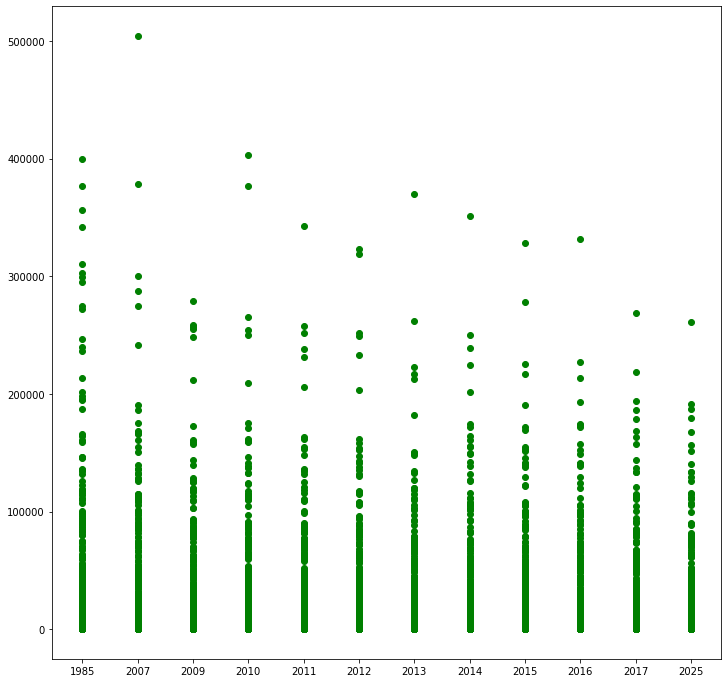

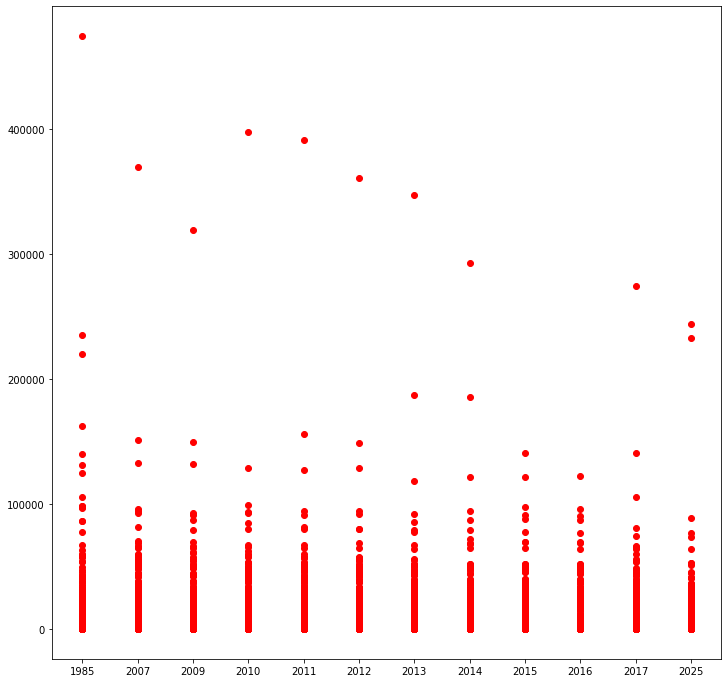

In [137]:
fig = plt.figure(figsize = (12, 12))
eastern_shore = nitrogen_df[nitrogen_df['Major Basin'] == 'Eastern Shore of Chesapeake Bay']
western_shore = nitrogen_df[nitrogen_df['Major Basin'] == 'Western Shore of Chesapeake Bay']
plt.scatter(eastern_shore['Year'], eastern_shore['Total lbs.'], c = "green")
fig = plt.figure(figsize = (12, 12))
plt.scatter(western_shore['Year'], western_shore['Total lbs.'], c = "red")

<AxesSubplot:xlabel='Year', ylabel='Total lbs.'>

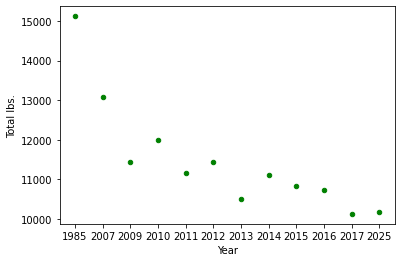

In [162]:
eastern_shore_ave = eastern_shore.groupby('Year').mean().reset_index()
eastern_shore_ave.plot.scatter(x='Year',y='Total lbs.', c = "green")

In [39]:
phosphorus_df = pd.read_csv('Phosphorus_loads.csv')
phosphorus_df = phosphorus_df.drop(['Land-River Segment', 'FIPS'], axis=1)

In [40]:
temp_dict = {}
#changes Total P, #### (lb.) -> ####
for column in phosphorus_df.columns[4:]:
    temp_dict[column] = re.findall("\d{4}", column)[0]


phosphorus_df = phosphorus_df.rename(columns=temp_dict)
phosphorus_df = pd.melt(phosphorus_df,id_vars=['County','Tributary Basin','Major Basin','Source Sector'], var_name='Year', value_name='Total lbs.')

<AxesSubplot:xlabel='Year', ylabel='Total lbs.'>

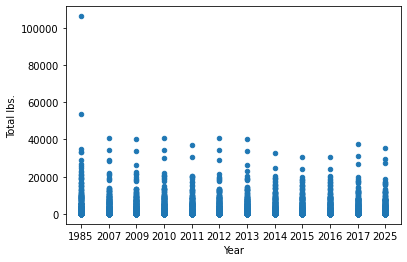

In [41]:
# phosphorus_df.plot.scatter(x='Year',y='Total lbs.', c='DarkBlue')
phosphorus_df[phosphorus_df['Major Basin'] == "Eastern Shore of Chesapeake Bay"].plot.scatter(x='Year',y='Total lbs.')

In [142]:
algae_df = pd.read_csv('LivingResourcesReportedStation.csv', low_memory =False, parse_dates=True)
algae_df.head()

Source SampleType Station SampleDate Layer SampleNumber  GMethod   TSN  \
0  MSU/PEARL          C   LE1.1  1/10/2000    AP          FS5        7  1455   
1  MSU/PEARL          C   LE1.1  1/10/2000    AP          FS5        7  1791   
2  MSU/PEARL          C   LE1.1  1/10/2000    AP          FS5        7  2160   
3  MSU/PEARL          C   LE1.1  1/10/2000    AP          FS5        7  2288   
4  MSU/PEARL          C   LE1.1  1/10/2000    AP          FS5        7  2402   

              LatinName            Size Method Parameter  ReportingValue  \
0            Ochromonas  Not Applicable  PH101     COUNT       1399780.0   
1    Apedinella radians  Not Applicable  PH101     COUNT         82340.0   
2      Chrysochromulina  Not Applicable  PH101     COUNT         82340.0   
3             Centrales     <10 Microns  PH101     COUNT        823400.0   
4  Skeletonema costatum  Not Applicable  PH101     COUNT      15068220.0   

  ReportingUnit   NODCCode  SPECCode  
0             L    4020103       625  
1             L  405040301       879  
2             L    6030101       603  
3             L        702       174  
4             L  702020101       136

In [147]:
prorocentrum_minimum = algae_df[algae_df['LatinName'] == 'Prorocentrum minimum'].copy(deep=True).reset_index()

In [148]:
prorocentrum_minimum = prorocentrum_minimum.rename(columns={"ReportingValue": "ReportingValue(L)"})
prorocentrum_minimum = prorocentrum_minimum.drop(['ReportingUnit','Parameter'], axis=1)
year = []
for date in prorocentrum_minimum.SampleDate:
    year.append(date[-2:])
prorocentrum_minimum['Year'] = year
prorocentrum_minimum

index     Source SampleType Station  SampleDate Layer SampleNumber  \
0        179  MSU/PEARL          C   CB5.2   1/18/2000    AP          FS5   
1        195  MSU/PEARL          C  CB3.3C   1/19/2000    AP          FS5   
2        215  MSU/PEARL          C  CB4.3C   1/19/2000    AP          FS5   
3        351  MSU/PEARL          C   CB2.2   1/20/2000    WC          FS7   
4        379    ODU/PEL          C    SBE5   1/21/2000    AP          FS1   
...      ...        ...        ...     ...         ...   ...          ...   
3813  222513    ODU/PEL          C  CB7.3E  12/13/2018    BP          FS1   
3814  222559    ODU/PEL          C   CB7.4  12/13/2018    AP          FS1   
3815  222609    ODU/PEL          C   CB7.4  12/13/2018    BP          FS1   
3816  222655    ODU/PEL          C   LE3.6  12/13/2018    AP          FS1   
3817  222695    ODU/PEL          C   LE3.6  12/13/2018    BP          FS1   

      GMethod   TSN             LatinName            Size Method  \
0           7  9880  Prorocentrum minimum  Not Applicable  PH101   
1           7  9880  Prorocentrum minimum  Not Applicable  PH101   
2           7  9880  Prorocentrum minimum  Not Applicable  PH101   
3           7  9880  Prorocentrum minimum  Not Applicable  PH101   
4           7  9880  Prorocentrum minimum  Not Applicable  PH102   
...       ...   ...                   ...             ...    ...   
3813        7  9880  Prorocentrum minimum  Not Applicable  PH103   
3814        7  9880  Prorocentrum minimum  Not Applicable  PH103   
3815        7  9880  Prorocentrum minimum  Not Applicable  PH103   
3816        7  9880  Prorocentrum minimum  Not Applicable  PH103   
3817        7  9880  Prorocentrum minimum  Not Applicable  PH103   

      ReportingValue(L)    NODCCode  SPECCode Year  
0               54893.0  1202010402       375   00  
1             1152760.0  1202010402       375   00  
2              576380.0  1202010402       375   00  
3               98808.0  1202010402       375   00  
4               13696.0  1202010402       375   00  
...                 ...         ...       ...  ...  
3813           291264.0  1202010402       375   18  
3814           866688.0  1202010402       375   18  
3815           157035.8  1202010402       375   18  
3816           816960.0  1202010402       375   18  
3817           466834.3  1202010402       375   18  

[3818 rows x 16 columns]

<AxesSubplot:xlabel='Year', ylabel='ReportingValue'>

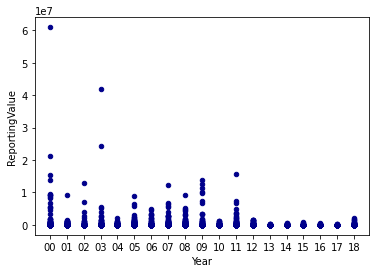

In [10]:
prorocentrum_minimum.plot.scatter(x='Year',y='ReportingValue(L)', c='DarkBlue')

<AxesSubplot:title={'center':'Yearly averages for Prorocentrum Minimum'}, xlabel='Year', ylabel='ReportingValue(L)'>

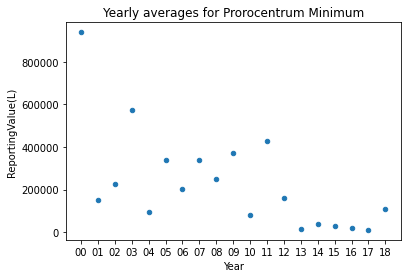

In [151]:
prorocentrum_minimum = prorocentrum_minimum.groupby('Year').mean().reset_index()
prorocentrum_minimum.plot.scatter(x='Year',y='ReportingValue(L)', title = "Yearly averages for Prorocentrum Minimum")

https://www.cbf.org/how-we-save-the-bay/chesapeake-clean-water-blueprint/the-history-of-bay-cleanup-efforts.html
This link may explain why there is a general decrease in prorocentrum minimum over the years

In [153]:
blue_green_sphere = algae_df[algae_df['LatinName'] == 'Blue green sphere'].copy(deep=True).reset_index()
blue_green_sphere = blue_green_sphere.rename(columns={"ReportingValue": "ReportingValue(L)"})
blue_green_sphere = blue_green_sphere.drop(['ReportingUnit','Parameter'], axis=1)
year = []
for date in blue_green_sphere.SampleDate:
    year.append(date[-2:])
blue_green_sphere['Year'] = year
blue_green_sphere.head()

index   Source SampleType Station SampleDate Layer SampleNumber  GMethod  \
0     39  ODU/PEL          C  RET4.3  1/12/2000    AP          FS1        7   
1     40  ODU/PEL          C  RET4.3  1/12/2000    AP          FS1        7   
2     41  ODU/PEL          C  RET4.3  1/12/2000    AP          FS1        7   
3     65  ODU/PEL          C  RET4.3  1/12/2000    BP          FS1        7   
4     66  ODU/PEL          C  RET4.3  1/12/2000    BP          FS1        7   

   TSN          LatinName        Size Method  ReportingValue(L) NODCCode  \
0    0  Blue green sphere      Sphere  PH102          1369600.0        3   
1    0  Blue green sphere    Trichome  PH102           273920.0        3   
2    0  Blue green sphere  Trichome B  PH102           602624.0        3   
3    0  Blue green sphere      Sphere  PH102           962979.0        3   
4    0  Blue green sphere    Trichome  PH102           283229.0        3   

   SPECCode Year  
0       815   00  
1       816   00  
2      1349   00  
3       815   00  
4       816   00

<AxesSubplot:xlabel='Year', ylabel='ReportingValue'>

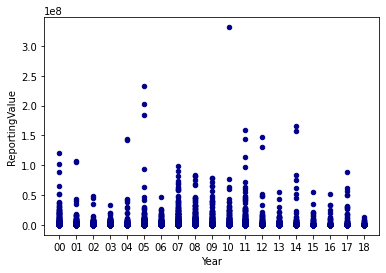

In [14]:
blue_green_sphere.plot.scatter(x='Year',y='ReportingValue', c='DarkBlue')

<AxesSubplot:title={'center':'Yearly averages for Prorocentrum Minimum'}, xlabel='Year', ylabel='ReportingValue(L)'>

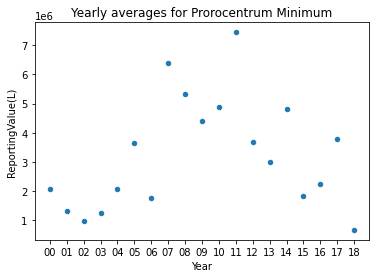

In [154]:
blue_green_sphere = blue_green_sphere.groupby('Year').mean().reset_index()
blue_green_sphere.plot.scatter(x='Year',y='ReportingValue(L)', title = "Yearly averages for Prorocentrum Minimum")

In [22]:
# oxygen_levels = pd.read_csv('AN_OCEAN_2016-2018.csv')
# oxygen_levels.plot.scatter(x='Year',y='Oxygen (millilitres O2 per liter)', c='DarkBlue')

In [165]:
activites_df = pd.read_csv('Reduction_Activities.csv')
activites_df["Fiscal Year"] = list(range(2000,2015))

In [167]:
activites_df["Stormwater_CS"] = (activites_df['Stormwater Retrofits: Pounds of Nitrogen Removed'].cumsum())

<AxesSubplot:xlabel='Fiscal Year', ylabel='Stormwater Retrofits: Pounds of Nitrogen Removed'>

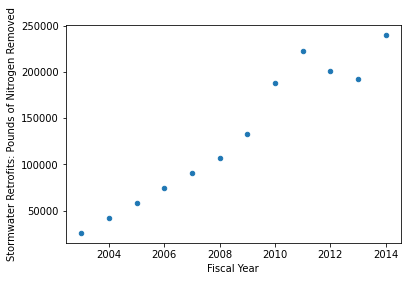

In [180]:
activites_df.plot.scatter(x = "Fiscal Year", y = "Stormwater Retrofits: Pounds of Nitrogen Removed" )

In [179]:
activites_df

Fiscal Year  \
0          2000   
1          2001   
2          2002   
3          2003   
4          2004   
5          2005   
6          2006   
7          2007   
8          2008   
9          2009   
10         2010   
11         2011   
12         2012   
13         2013   
14         2014   

    Certified Cover Crops Acres Planted in Chesapeake Bay Watershed (Annually)  \
0                                              159773                            
1                                               70920                            
2                                               97755                            
3                                              113628                            
4                                               31335                            
5                                               52302                            
6                                              124800                            
7                                              232985                            
8                                              179366                            
9                                              179366                            
10                                             204713                            
11                                             404072                            
12                                             410676                            
13                                             384794                            
14                                             407541                            

    Stormwater Retrofits: Pounds of Nitrogen Removed  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                            26101.0   
4                                            42391.0   
5                                            58347.0   
6                                            74706.0   
7                                            90689.0   
8                                           106761.0   
9                                           132453.0   
10                                          188456.0   
11                                          222584.0   
12                                          201315.0   
13                                          192698.0   
14                                          239583.0   

    Stormwater Retrofits: New Pounds of Nitrogen Removed  \
0                                                 NaN      
1                                                 NaN      
2                                                 NaN      
3                                             26101.0      
4                                             16290.0      
5                                             15956.0      
6                                             16359.0      
7                                             15983.0      
8                                             16072.0      
9                                             25692.0      
10                                            56003.0      
11                                            21269.0      
12                                             8617.0      
13                                             4242.0      
14                                            16999.0      

    Stormwater Retrofits: Existing Pounds of Nitrogen Removed  \
0                                                 NaN           
1                                                 NaN           
2                                                 NaN           
3                                                 0.0           
4                                             26101.0           
5                                             42391.0           
6                                             58347.0           
7       